In [122]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [123]:
#dataframe publico gasto com frota de veículos da UFMG
gasto_frota = pd.read_csv(r'F:\Graduações\Data Analisys\Recursos projetos\relatorio-gastos-frota.csv', encoding = "ISO-8859-1")
gasto_frota.head()

,ORDEM DE SERVIÇO,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Filtros: Da Abert. : 01/01/2021 até 28/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O.S.,VEÍCULO,DEPARTAMENTO,Data Fechamento,M.O Interna,M.O Externa,Peças,Total
2,19748,GMF7177,PRA-DLO-DSU,26/01/2021,R$ 0.00,R$ 0.00,R$ 0.00,R$ 0.00
3,19749,GMF2862,PRA-DGA-AREAS VERDES,26/01/2021,R$ 296.28,R$ 0.00,R$ 497.01,R$ 793.29
4,19750,GMF7226,DDCS CEDECOM TV UFMG,24/02/2021,R$ 98.76,R$ 0.00,R$ 0.00,R$ 98.76


In [124]:
gasto_frota.columns = ["Ordem de Serviço","Veículo", "Departamento", "Data Fechamento","M.O Interna","M.O Externa","Peças","Gasto Total"]

In [125]:
gasto_frota.head()

,Ordem de Serviço,Veículo,Departamento,Data Fechamento,M.O Interna,M.O Externa,Peças,Gasto Total
0,Filtros: Da Abert. : 01/01/2021 até 28/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O.S.,VEÍCULO,DEPARTAMENTO,Data Fechamento,M.O Interna,M.O Externa,Peças,Total
2,19748,GMF7177,PRA-DLO-DSU,26/01/2021,R$ 0.00,R$ 0.00,R$ 0.00,R$ 0.00
3,19749,GMF2862,PRA-DGA-AREAS VERDES,26/01/2021,R$ 296.28,R$ 0.00,R$ 497.01,R$ 793.29
4,19750,GMF7226,DDCS CEDECOM TV UFMG,24/02/2021,R$ 98.76,R$ 0.00,R$ 0.00,R$ 98.76


In [126]:
#limpado do df, retirando NaN e fileiras em branco ou com texto 
gasto_frota = gasto_frota.dropna()
gasto_frota = gasto_frota.loc[gasto_frota["Ordem de Serviço"] != "O.S."]
gasto_frota = gasto_frota.loc[gasto_frota["Ordem de Serviço"] != 0]

In [127]:
#Definindo função para retirar R$ das células "Gasto Total"
def limpador(x):
    if isinstance(x, str):
        return(x.replace('R$', '').replace(',', ''))
    return(x)

gasto_frota["Gasto Total"] = gasto_frota["Gasto Total"].apply(limpador).astype(float)

In [131]:
#Verificando gasto por departamento
gasto_depart = gasto_frota.groupby(["Departamento","Gasto Total"]).sum().reset_index()
gasto_depart.sort_values("Departamento")
gasto_depart = gasto_depart.loc[gasto_depart["Gasto Total"] != 280836.49]
gasto_depart.head()

,Departamento,Gasto Total,Ordem de Serviço,Veículo,Data Fechamento,M.O Interna,M.O Externa,Peças
1,ARQ-GABINETE,32.92,1982319939,GMF5169GMF5169,29/03/2021 06/08/2021,R$ 32.92R$ 32.92,R$ 0.00R$ 0.00,R$ 0.00R$ 0.00
2,ARQ-GABINETE,65.84,20008,GMF5169,06/10/2021,R$ 65.84,R$ 0.00,R$ 0.00
3,ARQ-GABINETE,596.30,20065,GMF5169,17/11/2021,R$ 115.22,R$ 0.00,R$ 481.08
4,COLTEC-SECAO LOGISTICA,718.76,19751,GMF6933,26/01/2021,R$ 98.76,R$ 0.00,R$ 620.00
5,CP MUSEU ITINERANTE,796.34,20205,HKT2009,10/01/2022,R$ 0.00,R$ 796.34,R$ 0.00


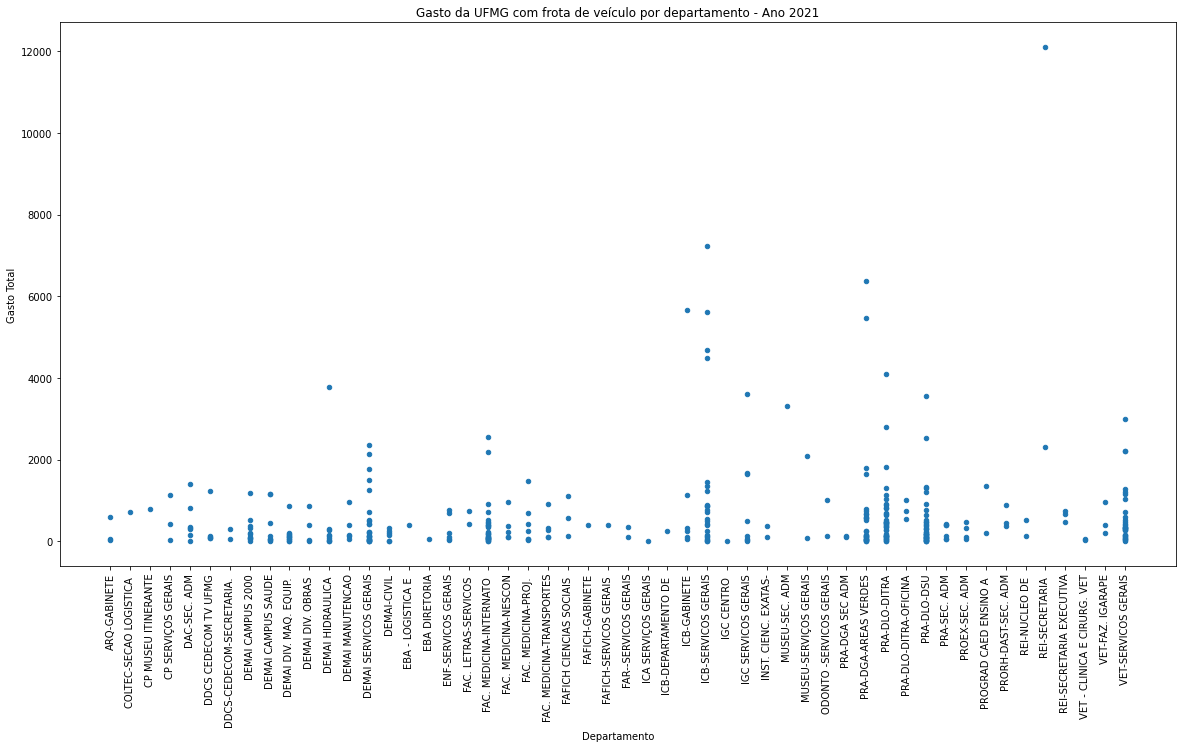

In [139]:
#visualizando os gastos totais por departamento da UFMG
gasto_depart.plot.scatter(x="Departamento", y="Gasto Total", title = "Gasto da UFMG com frota de veículo por departamento - Ano 2021", figsize=(20,10) )
plt.xticks(rotation=90)
plt.show()